# Исследование данных о российском кинопрокате



Заказчик исследования — Министерство культуры Российской Федерации. 
 
В работе были использованы данные, опубликованные на портале открытых данных Министерства культуры.  
https://opendata.mkrf.ru/  
Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов,   
а также информацию с сайта КиноПоиск. 

**Цели исследования**

- изучить рынок российского кинопроката и выявить текущие тренды. 
  - уделить внимание фильмам, которые получили государственную поддержку,
  - ответить на вопрос, насколько такие фильмы интересны зрителю.


**Описание данных**

Таблица **mkrf_movies** содержит информацию из реестра прокатных удостоверений. 

- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.

Таблица **mkrf_shows** содержит сведения о показах фильмов в российских кинотеатрах.

- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях.

**Краткий план работы**

1. Выполнить предобработку данных
- Проверить типы данных в датафрейме и преобразовать там, где это необходимо.
- Изучить пропуски в датафрейме. 
- Проверить, есть ли в данных дубликаты. 
- Изучить столбцы, которые содержат категориальные значения.
- Посмотреть, какая общая проблема встречается почти во всех категориальных столбцах.
- Исправить проблемные значения.
- Изучить столбцы, которые хранят количественные значения. Проверить, есть ли подозрительные данные.

2. Добавить новые столбцы:
- Создать столбец с информацией о годе проката.
- Создать два столбца: с именем и фамилией главного режиссёра, с основным жанром фильма. 
- Посчитать, какую долю от общего бюджета фильма составляет государственная поддержка.

3. Исследовательский анализ данных:
- Посмотреть, сколько фильмов выходило в прокат каждый год. 
  Данные о прокате в кинотеатрах известны не для всех фильмов. 
    - Посчитать, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. 
    - Проанализировать, как эта доля менялась по годам. 
    - Сделайть вывод о том, какой период полнее всего представлен в данных.
- Изучить, как менялась динамика проката по годам. Найти год с минимальной и максимальной сумма сборов.
- С помощью сводной таблицы посчитать среднюю и медианную сумму сборов для каждого года. Сравнить значения и сделать выводы.
- Определить:
    - влияет ли возрастное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год? 
    - Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? 
    - Меняется ли картина в зависимости от года? Если да, предположить, с чем это может быть связано.

4. Исследовать фильмы, которые получили государственную поддержку


5. Описать полученные результаты и зафиксировать итоговый вывод проведённого исследования.

### Шаг 1. Открываем файлы с данными и объединяем их в один датафрейм. 



In [2]:
#импорт библиотек 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
#загрузка датасетов
data_movies = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')
data_shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')

Посмотрим общую информацию по столбцам обоих таблиц.

In [4]:
data_movies.info()
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Для проведения исследования таблицы необходимо объединить.
Для этого используем столбец ['puNumber'].  
Необходимо привести тип данных этого столбца в обоих таблицах к единому (числовому).

In [5]:
#приводим значения к числовому с заменой некорректных значений на NaN
data_movies['puNumber'] = pd.to_numeric(data_movies['puNumber'], errors='coerce')

#проверим изменение
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
#посмотрим на количество пропусков
data_movies.isna().sum().sort_values()

title                       0
show_start_date             0
type                        0
age_restriction             0
puNumber                    1
production_country          2
director                    9
film_studio                18
producer                  568
ratings                   967
genres                    976
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
dtype: int64

In [7]:
#удалим строки с пропусками в столбце puNumber
data_movies = data_movies.dropna(subset=['puNumber'])

#меняем тип данных на int
data_movies['puNumber'] = data_movies['puNumber'].astype('int')

#проверим изменение
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: float6

Теперь, когда типы значений в puNumber приведены к единому, приступим к объединению и изучению данных.

In [8]:
data = data_movies.merge(data_shows, on='puNumber', how='outer')

In [9]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [11]:
data.isna().sum().sort_values()

title                       0
puNumber                    0
show_start_date             0
type                        0
age_restriction             0
production_country          2
director                    9
film_studio                18
producer                  568
ratings                   966
genres                    975
box_office               4327
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
dtype: int64

In [12]:
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,box_office
count,"7,485.00",332.00,332.00,332.00,"3,158.00"
mean,"135,196,587.56","11,864,457.83","48,980,988.89","127,229,716.68","76,478,696.16"
std,"38,352,919.34","24,916,555.26","59,980,117.92","188,588,333.12","240,353,122.82"
min,"1,811,096.00",0.00,0.00,0.00,0.00
25%,"112,025,118.00",0.00,"25,000,000.00","42,000,000.00","86,239.00"
50%,"121,015,510.00",0.00,"30,000,000.00","68,649,916.00","2,327,987.55"
75%,"124,003,314.00","15,000,000.00","40,375,000.00","141,985,319.50","23,979,671.02"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00","3,073,568,690.79"


Проверим количество дубликатов

In [13]:
data.duplicated().sum()

0

#### Вывод

**Объединение таблиц**   
 
На данном этапе были объединены данные из двух таблиц в одну - **data**.   

Для объединения был использован столбец puNumber - уникальный номер прокатного удостоверения.   
В результате получили общую таблицу, где к данным из **data_movies** был добавлен столбец box_office с информацией о сборах в рублях.

**Описание данных**

Данные содержатся в 7485 строках и 16 столбцах. Данного объема иформации достаточно для исследования.  
Большинство столбцов имеет тип данных object, столбцы с количественными данными хранят тип float.   
Явные дубликаты в датасете отсутствуют.

***Типы данных***

Для дальнейшего анализа необходимо исправить следующие некорректные значения:
- **show_start_date** данные представлены в формате object, необходимо привести их в datetime
- **ratings** данные представлены в формате object, необходимо привести их в float

***Пропуски***

- **production_country**, **director, film_studio**, **producer**, **genres** содержат незначительное количество пропусков. Возможная причина в неполных данных в карточках фильмов на портале Кинопоиск. Заполнить их, используя другие данные из таблицы мы не можем, поэтому заменим их на **unknown**. 
- **ratings** пропуски составляют около 13%. Возможная причина - малое количество рецензий и оценок у фильма, из-за чего рейтинг только формируется. Так как корректное значение для заполнения мы не сможем найти, оставим пропуски как есть.
- **box_office** пропуски составляют около 60%. Данный столбец содержит данные для фильмов выходящих в прокат в кинотеатрах. Отсутсвие данных свидетельсвует о том, что фильмы в прокат не выходили. Оставим данные пропуски.
- **financing_source** данный столбец заполнен для тех фильмов, которые получили государственное финансирование. Пропуски в данном столбце заменим на "Независимое кино".
- **refundable_support**, **nonrefundable_support**, **budget** данные содержат объем государственных инвестиций, соответсвенно пропуски говорят об их отсутсвии. Изучим данные подробнее и решим, что делать с пропусками. 

### Шаг 2. Предобработка данных

**План работы**   

Изучим данные по каждому столбцу.  
- проверим тип данных и заменим его, где это необходимо
  -  show_start_date на datetime
  -  ratings на float
- изучим и заменим пропуски
  -  production_country, director, film_studio, producer, genres  на unknown.
  -  financing_source на "Независимое кино".
- найдем и удалим по возможности неявные дубликаты
- изучим общую проблему категориальных значений и по возможности исправим
- изучим количественные значения, посмотрим на выбросы и аномалии

Добавим новые столбцы
- год проката
- имя и фамилия основного режиссера
- основной жанр
- доля гос поддержки от общего бюджета фильма

#### Шаг 2.1.  Изучаем категориальные значения


##### Дата премьеры фильма

Изменим тип данных на Datetime

In [14]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ').dt.date

In [15]:
data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


##### Название фильма

Изучим количество уникальных значений

In [16]:
title_unique = data['title'].nunique()
display(f'Уникальных значений в названиях фильмов, {title_unique}')
display('Уникальные значения в названиях фильмов составляют {:.1%} от исходных значений'. format((title_unique) / len(data)))

'Уникальных значений в названиях фильмов, 6771'

'Уникальные значения в названиях фильмов составляют 90.5% от исходных значений'

Посмотрим на строки с дубликатами в названии фильмов

In [17]:
data[data.duplicated(subset='title', keep = False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.1,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.7,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7368,Невиновен,111019319,2019-11-07,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"триллер,детектив,криминал",NaN
7415,"Отель ""Гранд Будапешт""",121035119,2019-12-13,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"комедия,приключения,детектив",NaN
7437,Зверь,121035919,2019-12-05,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.5,"триллер,драма","175,003.51"
7449,В тихом омуте,121036919,2019-12-09,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",NaN


Заметим, что один и тот же фильм может иметь разный номер прокатного удостоверения.  
Из открытых источников мы узнали, что такое может быть, если фильм получал номер в разные сроки и для разных прокатных целей. Но тем не менее, в таких случаях фильм остается один и тот же. 

Однако, встречаются разные фильмы с одинаковым названием.
Чтобы избежать дубликатов мы отсортируем строки с совпадениями сразу в нескольких столбцах: в названии фильма, типе фильма, стране производителе, режиссере, рейтинге и жанре.

In [18]:
data[data.duplicated(subset=['title', 'type', 'production_country', 'director', 'ratings', 'genres' ], keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.1,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.7,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7254,Красная шапка против зла,124007319,2019-09-17,Анимационный,"Эджис Филм Фонд, Элинг Студиос, Фрэджил Филмз,...",США,Майкл Д'Иса-Хоган,Барнаби Томпсон,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.8,"мультфильм,комедия,криминал",NaN
7263,Руби и повелитель воды,124007619,2019-09-30,Анимационный,Итс Картун Анимейшн Студио,КНР,Дин Ши,Ван Юньфэй,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7264,Альдабра: Путешествие по таинственному острову,126003719,2019-09-30,Прочие,Старлайт Пикчерз,Чехия,Стив Лихтаг,"Петр Келлер, Роберт Шнайдер, Леопольдо Гоут",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.8,"семейный,приключения,документальный",NaN
7300,Ночь живых мертвецов,121029119,2019-10-30,Художественный,"Имейдж Тен, Лаурель Групп, Маркет Скьяр Продак...",США,Джордж А.Ромеро,"Расселл Страйнер, Карл Хардмен",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.3,"ужасы,триллер",NaN


Получили 1204 строки.
Удалим имеющиеся дубликаты.

In [19]:
data_unique = data.drop_duplicates(subset=['title', 'type', 'production_country', 'director', 'ratings', 'genres' ])

In [20]:
display('Доля сохраненных значений составляет {:.1%} от исходных данных'. format(len(data_unique) / len(data)))

'Доля сохраненных значений составляет 91.0% от исходных данных'

**Результат работы**   

Мы обнаружили, что один и тот же фильм может иметь разный номер прокатного удостоверения.   
Поэтому использовать данный столбец как гарант уникальности значений строки некорректно.

Однако нам удалось обнаружить менее 10% дубликатов, используя совпадения сразу по нескольким столбцам.  
Во избежании повторений одного и того же фильма в дальнейших исследованиях данные дубликаты были удалены.  
Для этого создали новый датафрейм data_unique.


##### Прокатное удостоверение

Проверим наличие дубликатов в прокатных удостоверениях.

In [21]:
data_unique[data_unique.duplicated(subset='puNumber', keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Дубликатов в номере прокатного удостоверения не обнаружено.  
Тип данных на целочисленный мы меняли ранее.  
Оставляем столбец без изменений.

##### Тип фильма

Посмотрим на уникальные значения столбца

In [22]:
sorted(data_unique['type'].unique())

[' Анимационный',
 ' Художественный',
 'Анимационный',
 'Документальный',
 'Музыкально-развлекательный',
 'Научно-популярный',
 'Прочие',
 'Художественный']

Заметим неявные дубликаты в строках с пробелами, удалим их

In [23]:
data_unique['type'] = data_unique['type'].str.strip()
sorted(data_unique['type'].unique())

['Анимационный',
 'Документальный',
 'Музыкально-развлекательный',
 'Научно-популярный',
 'Прочие',
 'Художественный']

Дубликаты успешно удалены

##### Студия-производитель

Заменим пропуски на unknown

In [24]:
data_unique['film_studio'] = data['film_studio'].fillna('unknown')

Посмотрим на количество уникальных значений

In [25]:
data_unique['film_studio'].nunique()

5482

Посмотрим на качество записи уникальных значений

In [26]:
sorted(data_unique['film_studio'].unique())

[' АНО "Кинофорум"',
 ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.',
 ' ЗАО "Кинокомпания ФаворитФильм" по заказу ООО "ФАВОРИТ МЕДИА"',
 ' Константин Фильм, А Эр Ди Дегето Фильм, Дюне Филис, Икури Филмз, Медуза Фильм, У Эф А Интернэшнл Филм энд Ти Ви Продуцион, Юниверсум Филм ',
 ' ООО "АВАТАРА"',
 ' ООО "КОСТАФИЛЬМ"',
 ' ООО "КиноФирма"',
 ' ООО "Кинокомпания "Студия ПРЕССИНГ"',
 ' ООО "Магнум-фильм"',
 ' ООО "Продюсерская фирма Игоря Толстунова"',
 ' ООО "Студия "Рой"',
 ' ООО "Студия 25", ООО "Медиа Арт Студио", ООО "Продюсерский центр "Синема Продакшн" ',
 ' ООО "Студия МЕТРАФИЛЬМС", Компания "TASSE film", Компания "SIRENA film"',
 ' ООО "ТаББаК"',
 ' ООО "ТаББаК", ООО "Анимационная студия "Москва"',
 ' ООО "ТаББаК", ООО "Весёлая Компания"',
 ' ООО "Форс Медиа"',
 ' ООО "Хардкор", ООО "Патриот продакшнс"',
 ' ООО "Энджой мувиз"',
 ' ООО "Энджой мувиз", ООО "Эмоушен Пикчерз", ООО "РЕНОВАЦИО интертейнмент"',
 ' ООО Продюсерский центр "Фёдор Добронравов"',
 ' Юниверсал Пикчерз',


Можем  заметить что данные содержат пробелы, лишние символы, небрежно записаны в целом.   
Так как уникальных значений очень много, а чистота данных в этом столбец для дальнейшего исследования нам не особо важна, оставим данные как есть.

##### Страна-производитель

Заменим пропуски на unknown

In [27]:
data_unique['production_country'] = data_unique['production_country'].fillna('unknown')

Посмотрим на количество уникальных значений

In [28]:
data_unique['production_country'].nunique()

951

Посмотрим на качество записи уникальных значений

In [29]:
sorted(data_unique['production_country'].unique())

[' СССР',
 ' СССР ',
 ' СССР   ',
 '2019',
 'CША',
 'unknown',
 'Австралия',
 'Австралия - Великобритания - Бельгия - Индия',
 'Австралия - Германия',
 'Австралия - Ирландия',
 'Австралия - Колумбия',
 'Австралия - США',
 'Австралия, Канада',
 'Австралия, США',
 'Австралия-Великобритания',
 'Австралия-Ирландия',
 'Австралия-США',
 'Австралия-Турция-США',
 'Австрия',
 'Австрия - Германия',
 'Австрия - Германия - Франция',
 'Австрия - Люксембург',
 'Австрия, Великобритания, Германия',
 'Австрия-Германия-Франция',
 'Австрия-Франция-Германия',
 'Азербайджан-Россия',
 'Аргентина',
 'Аргентина - Бразилия',
 'Аргентина - Испания',
 'Аргентина - Испания - Уругвай',
 'Аргентина - Мексика - Бразилия - Франция - США',
 'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
 'Аргентина - Франция - Испания',
 'Аргентина, Испания',
 'Аргентина-Испания',
 'Армения',
 'Армения - Германия',
 'Армения - Казахстан',
 'Армения-Россия',
 'Бельгия',
 'Бельгия - Германия - Люксембург',
 'Бельгия -

На первый взгляд видны три проблемы.   
Первая - наличие дубликатов из-за пробелов, вторая - разные символы при разделении нескольких стран, третья - в страны попал год 2019. 
Посмотрим на эту строку.   


In [30]:
data_unique.loc[data_unique['production_country'] == '2019']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7246,Дело Коллини,121027219,2019-09-19,Художественный,"Константин Филм, Глобал Скрин, Севен Пикчерз Сван",2019,Марко Кройцпайнтнер,"Мартин Московиц, Кристоф Мюллер, Марсель Хартг...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"детектив,драма,криминал",NaN


Заменим 2019 на unknown, разделительный символ '-' на ',', уберем пробелы.

In [31]:
replace_dict = {'2019': 'unknown', '-': ',', ' ': ''}
data_unique['production_country'] = data_unique['production_country'].replace(replace_dict, regex=True)

In [32]:
data_unique['production_country'].nunique()

812

Нам удалось избавиться от 139 дублей и некоректных значений.

##### Режиссер

Заменим пропуски на unknown

In [33]:
data_unique['director'] = data_unique['director'].fillna('unknown')

Посмотрим на качество записи уникальных значений

In [34]:
sorted(data_unique['director'].unique())

[' Йохан Нийенхейс',
 ' Н.Орлов, Р.Быков',
 ' Р.Асхаев',
 ' Т.Саакян',
 ' Ф.Бондарчук',
 'unknown',
 'Ёлкин Туйчиев',
 'Ён Сан-хо',
 'А Андрющенко',
 'А. Калюжный',
 'А. Кутерье',
 'А.А.Эшпай',
 'А.Аббасов',
 'А.Абидова (псевдоним Аниса Сабири)',
 'А.Аболс',
 'А.Агаджанян',
 'А.Адилханян',
 'А.Адраникян',
 'А.Аксененко',
 'А.Аксененко, Э.Никогосян, Д.Дюжев, А.Вакулов (А.Кульбицкий)',
 'А.Алов, В.Наумов',
 'А.Аманшаев, Г.Шенгелия',
 'А.Амбросьев',
 'А.Амиров',
 'А.Ананикян, В.Рейнгеверц',
 'А.Андрианов',
 'А.Андризани, А.Бардани, В.Карнелутти, Ф.Коста,  Г.С.Нардис, В.Пальмьери, В.Чеа, А.Юлиано ',
 'А.Анненский',
 'А.Аравин',
 'А.Аравин, А.Прошкин',
 'А.Арпеньтеньер, А.Бариларо, М.Бланчес, Р.Валлей, Л.Гранд, Ф.Дион, А.Жасина, Э.Коэтс,  Лу Хаму-Лхад, П.Осборн, Т.Ушев',
 'А.Артамонова',
 'А.Арутюнов',
 'А.Арутюнян, А.Коршунов',
 'А.Атанесян',
 'А.Бадягина',
 'А.Бажанов',
 'А.Балабанов',
 'А.Балахонов',
 'А.Бальчев',
 'А.Баранов',
 'А.Баршак',
 'А.Барщевский, И.Матвеев',
 'А.Барыкин',
 'А.Б

Для разделения нескольких значений в строке используется только запятая.  
В дальнейшем нам будет удобно создать столбец, куда войдет ФИО режиссера, который уканан в списке первым.
Наблюдатся неявные дубликаты (Вольфганг Петерсен/ Вольфганг Петерсон), но из-за количества данных пытаться исправить эту неточность кажется нецелесообразно.  
Нет необходимости вносить дополнительные изменения в данные для дальнейшено иследования.

##### Продюсер

Заменим пропуски на unknown

In [35]:
data_unique['producer'] = data_unique['producer'].fillna('unknown')

Посмотрим на качество записи уникальных значений

In [36]:
sorted(data_unique['producer'].unique())

[' А.Шальопа',
 ' Г.Шпригов',
 ' Дитмар Ганше, Филипп Фогес,  Бенджамин Херрман, Миша Хоффманн, Эберхард Юнексдорф, Энн Мередит',
 ' И.Гелашвили',
 ' К.Шахназаров, А.Златопольский',
 ' Мишель Чиджик, Джефф Абберли, Натали Марисано',
 ' ООО "Арт Пикчерс Студия"',
 ' ООО "Арт Пикчерс Студия", ФГУП "ВГТРК"',
 ' ООО "КиноФирма"',
 ' ФГУП "Киноконцерн "Мосфильм"',
 '"Фонд Михаила Калатозова"',
 'unknown',
 'Ёсиаки Нисимура, Джеффри Уэкслер',
 'А. Калюжный',
 'А. Натахин',
 'А.А.Эшпай',
 'А.Аболс',
 'А.Адамская',
 'А.Адраникян, В.Горяинов',
 'А.Ананикян',
 'А.Ананикян, Г.Андреасян, С.Андреасян',
 'А.Ананикян, С.Андреасян, Г.Андреасян',
 'А.Аствацатрян, С.Сельянов',
 'А.Атанесян, А.Кириллин, Л.Тарасов',
 'А.Атанесян, М.Бабаханов, Р.Бутко',
 'А.Атанесян, Р.Атоян',
 'А.Балашов',
 'А.Барыкин',
 'А.Барыкин, В.Братухин, О.Суров',
 'А.Басов',
 'А.Белов',
 'А.Берденников',
 'А.Бессчетнова, М.Евдокимова, А.Куренков',
 'А.Бзаров',
 'А.Бик, П.Бранкати, Ф.Будвег, М.де Конинг, П.А.Марион, Г.Мендеш, М.Сит

Наблюдатся неявные дубликаты (Вибеке Винделев/ Вибеке Винделов), но из-за количества данных пытаться исправить эту неточность кажется нецелесообразно.
Нет необходимости вносить дополнительные изменения в данные для дальнейшено иследования.

##### Возрастная категория

Выведем уникальные значения

In [37]:
sorted(data_unique['age_restriction'].unique())

['«0+» - для любой зрительской аудитории',
 '«12+» - для детей старше 12 лет',
 '«16+» - для детей старше 16 лет',
 '«18+» - запрещено для детей',
 '«6+» - для детей старше 6 лет']

Дубликатов и пропусков нет, тип верный.   
Оставляем данные без изменений.

##### Источник государственного финансирования

В данном столбце кол-во пропусков 6479.  
Значения отсутствуют для тех фильмов, которые не получали гос финансирование. Заменим пропуски на "Независимое кино".

In [38]:
data_unique['financing_source'] = data_unique['financing_source'].fillna('Независимое кино')

Выведем уникальные значения

In [39]:
sorted(data_unique['financing_source'].unique())

['Министерство культуры',
 'Министерство культуры, Фонд кино',
 'Независимое кино',
 'Фонд кино']

Мы удалили пропуски, дубликатов нет, тип данных верный.

##### Жанр фильма

Заменим пропуски на unknown

In [40]:
data_unique['genres'] = data_unique['genres'].fillna('unknown')

Посмотрим на качество записи уникальных значений

In [41]:
sorted(data_unique['genres'].unique())

['unknown',
 'аниме,мультфильм',
 'аниме,мультфильм,боевик',
 'аниме,мультфильм,детектив',
 'аниме,мультфильм,драма',
 'аниме,мультфильм,комедия',
 'аниме,мультфильм,короткометражка',
 'аниме,мультфильм,мелодрама',
 'аниме,мультфильм,приключения',
 'аниме,мультфильм,ужасы',
 'аниме,мультфильм,фантастика',
 'аниме,мультфильм,фэнтези',
 'биография',
 'биография,военный,драма',
 'биография,документальный',
 'биография,драма',
 'биография,драма,военный',
 'биография,драма,история',
 'биография,драма,криминал',
 'биография,история',
 'биография,история,драма',
 'биография,криминал,драма',
 'биография,криминал,триллер',
 'биография,мелодрама,драма',
 'биография,музыка,драма',
 'биография,музыка,мюзикл',
 'биография,спорт,драма',
 'биография,спорт,история',
 'биография,спорт,комедия',
 'боевик',
 'боевик,вестерн,приключения',
 'боевик,военный',
 'боевик,военный,драма',
 'боевик,военный,история',
 'боевик,детектив',
 'боевик,драма',
 'боевик,драма,биография',
 'боевик,драма,вестерн',
 'боевик,

Для разделения нескольких значений в строке используется только запятая.  
В дальнейшем нам будет удобно создать столбец, куда войдет название жанра, который уканан в списке первым.
Дополнительных действий с данными на данном этапе не требуется.

Выведем количество уникальных значений

In [42]:
data_unique['genres'].nunique()

743

##### Вывод по категориальным значениям

Большинство столбцов с категориальными значениями имеют схожие проблемы в данных: 
- неявные дубликаты (Вибеке Винделев/ Вибеке Винделов), 
- лишние пробелы и символы в строках, 
- разный стиль записей,
  -  рейтинг то в процентах, то в десячином значении
  -  режиссеры и продюссеры то в сокращенном варинте с инициалами, то с полным ФИО
- большое количество уникальных значий из-за перечислений в строке не позволит сгруппировать информацию в дальнейшем (например количество жанров 743, хотя в целом столько жанров вряд ли существует) 

В большинстве случаев исправить подобные ошибки в ручную невозможно из-за большого объема. 
Часть данных мы исправили, удалив пробелы и символы.
Информацию о режиссерах и жанрах мы решим созданием новых столбцов, в которые войдут первые значения (до запятой) из строк.
Сделать данные более удобными для анализа помогло бы автозаполнение значений в источнике из ратифицированной базы данных режиссеров, студий-производителей, жанров и т.д.

#### Шаг 2.5. Изучаем количественные значения


##### Рейтинг фильма

Посмотрим на количество пропусков

In [43]:
data_movies['ratings'].isna().sum()

966

Выведем уникальные значения

In [44]:
data_unique['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Часть данных записана в процентах от 0 до 100, в то время как большинство значений - десятичные.  
Исправим эту неточность.

Создадим маску для работы с не nan значениями.  
Удалим символы процентов и изменим тип.

In [45]:
for col in['ratings']:
    mask = data_unique[col].notna()
    data_unique.loc[mask, col] = data_unique.loc[mask, col].str.replace('%', '')
    data_unique.loc[mask, col] = data_unique.loc[mask, col].astype('float')

In [46]:
#добавляем в значения больше 10 запятую
data_unique.loc[data_unique['ratings'] >= 10, 'ratings'] = data_unique['ratings'] / 10 

In [47]:
data_unique['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8.0, 7.8, 8.1, 7.1, 6.0, 7.4, 5.8, 8.7,
       6.3, 6.9, 5.0, 4.3, 7.3, 7.0, 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4.0, 3.0, 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9.0, 1.9,
       1.0, 8.9, 1.3, 1.8, 1.2, 1.7, 9.8], dtype=object)

In [48]:
data_unique['ratings'] = data_unique['ratings'].astype('float')

Данные исправлены успешно.  
Посмотрим на данные подробнее.

In [49]:
data_unique['ratings'].describe()

count   5,852.00
mean        6.47
std         1.13
min         1.00
25%         5.80
50%         6.60
75%         7.20
max         9.90
Name: ratings, dtype: float64

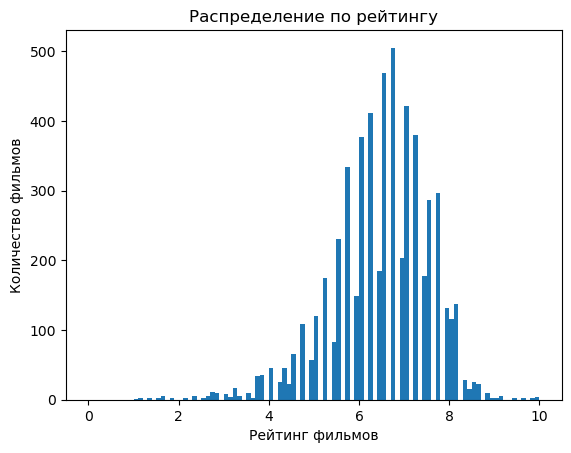

In [50]:
plt.hist(data_unique['ratings'], bins=100, range=(0,10))
plt.title('Распределение по рейтингу')
plt.xlabel('Рейтинг фильмов')
plt.ylabel('Количество фильмов')
plt.show()

Пропуски говорят о том, что 966 фильмов не имеет оценки.  
Распределение остальных значений нормальное, пик на рейтинге 6.4.  
Большая часть рейтинга оцененных фильмов находится в диапазоне между 5.0 и 8.0.

##### Объём возвратных средств государственной поддержки

Выведем информацию о данных

In [51]:
data_unique['refundable_support'].describe()

count           331.00
mean     11,900,302.11
std      24,945,704.90
min               0.00
25%               0.00
50%               0.00
75%      15,000,000.00
max     180,000,000.00
Name: refundable_support, dtype: float64

Для удобства приведем столбец к миллионам и отразим это в названии столбца

In [52]:
data_unique['refundable_support'] = (data_unique['refundable_support']/1000000*1.0).round()

In [53]:
data_unique.rename(columns={'refundable_support': 'refundable_support_mln'}, inplace=True)
data_unique['refundable_support_mln'].describe()

count   331.00
mean     11.90
std      24.95
min       0.00
25%       0.00
50%       0.00
75%      15.00
max     180.00
Name: refundable_support_mln, dtype: float64

Так как наличие данных в этом столбце , как и в других столбцах с данными о гос поддержке, свидетельствует о наличии этих средств и данные уже содержат нулевые значения, предлагаю оставить пропуки в этих столбцах как есть, не заменяя их 0.

Среднее значение отличается от медианы, значит аномальные значения сильно влияют на данные.  
Построим диаграмму размаха.

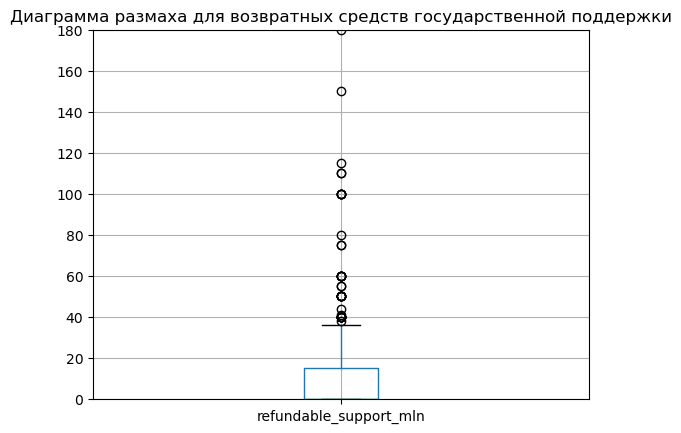

In [54]:
data_unique.boxplot('refundable_support_mln')
plt.title('Диаграмма размаха для возвратных средств государственной поддержки')
plt.ylim(0, 180)
plt.show()

Все значения выше верхнего уса (выше 40) считаем аномальными.  
Посмотрим какой процент составляют аномальные значения

In [55]:
ref_anom = len(data_unique.loc[data_unique['refundable_support_mln'] > 40])
len_support = len(data_unique.loc[data_unique['refundable_support_mln'].notna()])
display('Аномальные значения составляют {:.1%}'. format(ref_anom / len_support))

'Аномальные значения составляют 9.4%'

Так как аномальные значения составляют почти 10% и скорее всего не являются ошибкой при сборе данных, оставим столбец без изменений.

##### Объём невозвратных средств государственной поддержки

In [56]:
data_unique['nonrefundable_support'].describe()

count           331.00
mean     49,038,333.27
std      60,061,812.82
min               0.00
25%      25,000,000.00
50%      30,000,000.00
75%      40,750,000.00
max     400,000,000.00
Name: nonrefundable_support, dtype: float64

Для удобства приведем столбец к миллионам и отразим это в названии столбца

In [57]:
data_unique['nonrefundable_support'] = (data_unique['nonrefundable_support']/1000000*1.0).round()

In [58]:
data_unique.rename(columns={'nonrefundable_support': 'nonrefundable_support_mln'}, inplace=True)
data_unique['nonrefundable_support_mln'].describe()

count   331.00
mean     49.04
std      60.06
min       0.00
25%      25.00
50%      30.00
75%      41.00
max     400.00
Name: nonrefundable_support_mln, dtype: float64

Нулевые в данном столбце встречаются реже, чем в столбце с возвратными средствами. Запомним это и изучим подробнее позже.
Данные оставляем как есть.

Среднее значение отличается от медианы, значит аномальные значения сильно влияют на данные.  
Построим диаграмму размаха.

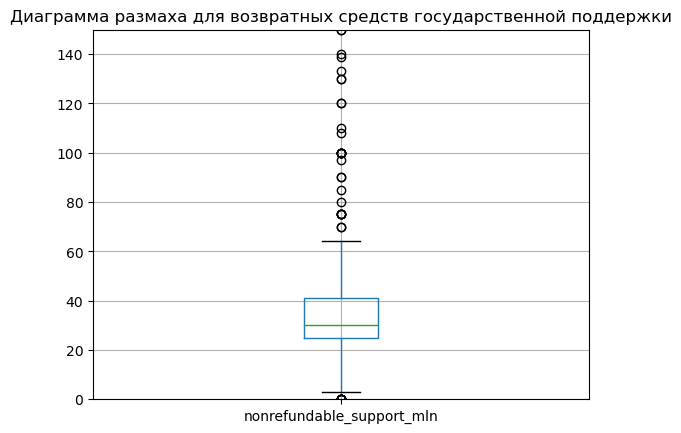

In [59]:
data_unique.boxplot('nonrefundable_support_mln')
plt.title('Диаграмма размаха для возвратных средств государственной поддержки')
plt.ylim(0, 150)
plt.show()

Все значения выше верхнего уса (выше 65) считаем аномальными.  
Посмотрим какой процент составляют аномальные значения.

In [60]:
nonref_anom = len(data_unique.loc[data_unique['nonrefundable_support_mln'] > 65])
display('Аномальные значения составляют {:.1%}'. format(nonref_anom / len_support))

'Аномальные значения составляют 14.2%'

Так как аномальные значения составляют 14% и скорее всего не являются ошибкой при сборе данных, оставим столбец без изменений.

##### Общий бюджет фильма

In [61]:
data_unique['budget'].describe()

count             331.00
mean      127,469,081.39
std       188,823,340.91
min                 0.00
25%        42,000,000.00
50%        68,809,226.00
75%       143,945,639.00
max     2,305,074,303.00
Name: budget, dtype: float64

Для удобства приведем столбец к миллионам и отразим это в названии столбца

In [62]:
data_unique['budget'] = (data_unique['budget']/1000000*1.0).round()

In [63]:
data_unique.rename(columns={'budget': 'budget_mln'}, inplace=True)
data_unique['budget_mln'].describe()

count     331.00
mean      127.44
std       188.82
min         0.00
25%        42.00
50%        69.00
75%       144.00
max     2,305.00
Name: budget_mln, dtype: float64

Данный столбец должен содержать данные о общем бюджете фильма, включая возвратные гос средства и/или невозвратные.  
Проверим нет ли строк с бюджетом меньше, чем средства гос поддержки.

In [64]:
data_budget_zero = data_unique.query(
    'refundable_support_mln > budget_mln  or nonrefundable_support_mln > budget_mln \
    or (refundable_support_mln + nonrefundable_support_mln) > budget_mln')
data_budget_zero

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support_mln,nonrefundable_support_mln,budget_mln,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23.00,0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2057,Дуxless 2,111000415,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75.00,0.00,Фонд кино,6.60,драма,"446,163,511.00"
2471,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10.00,70.00,0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2531,Бармен.,111009615,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20.00,0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2614,Савва. Сердце воина,114001715,2015-07-21,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60.00,100.00,0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2683,Тряпичный союз,111010215,2015-06-08,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59.00,0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2787,Срочно выйду замуж,111017115,2015-09-30,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35.00,0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2873,Помню - не помню!,111004916,2016-03-01,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6.00,0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3046,Любовь с ограничениями,111008216,2016-04-29,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19.00,51.00,0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3564,Притяжение (2016),111018116,2016-12-16,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250.00,0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


17 строк содержат нулевой бюджет, в то время как соседние столбцы с гос поддержкой имеют данные больше ноля.
Это явно ошибка. Мы можем заполнить эти данные медианным значением, узнав какую долю обычно составляет гос поддержка от общего бюджета фильма.

In [65]:
#создаем переменную с фильмами с гос поддержкой
gos_support = data_unique[data_unique['refundable_support_mln'].notna()]

In [66]:
#считаем медиану
median_gos_support = (
    (gos_support['refundable_support_mln'] + gos_support['nonrefundable_support_mln']) / gos_support['budget_mln']).median()

In [67]:
median_gos_support * 100

60.97560975609756

Медианный процент гос поддержки около 61%.  
Заполним нулевые значения.

In [68]:
data_unique.loc[data_budget_zero.index, 'budget_mln'] = \
(data_unique.loc[data_budget_zero.index, 'refundable_support_mln'] + \
 data_unique.loc[data_budget_zero.index, 'nonrefundable_support_mln']) / median_gos_support
data_unique.loc[data_budget_zero.index]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support_mln,nonrefundable_support_mln,budget_mln,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23.00,37.72,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2057,Дуxless 2,111000415,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75.00,123.00,Фонд кино,6.60,драма,"446,163,511.00"
2471,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10.00,70.00,131.20,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2531,Бармен.,111009615,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20.00,0.00,32.80,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2614,Савва. Сердце воина,114001715,2015-07-21,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60.00,100.00,262.40,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2683,Тряпичный союз,111010215,2015-06-08,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59.00,96.76,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2787,Срочно выйду замуж,111017115,2015-09-30,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35.00,57.40,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2873,Помню - не помню!,111004916,2016-03-01,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6.00,9.84,Министерство культуры,4.30,комедия,"15,362,931.43"
3046,Любовь с ограничениями,111008216,2016-04-29,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19.00,51.00,114.80,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3564,Притяжение (2016),111018116,2016-12-16,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250.00,410.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


In [69]:
data_unique['budget_mln'].describe()

count     331.00
mean      134.34
std       187.93
min         9.84
25%        46.00
50%        75.00
75%       150.00
max     2,305.00
Name: budget_mln, dtype: float64

Данные успешно заполнены

Среднее значение отличается от медианы, значит аномальные значения сильно влияют на данные.  
Построим диаграмму размаха.

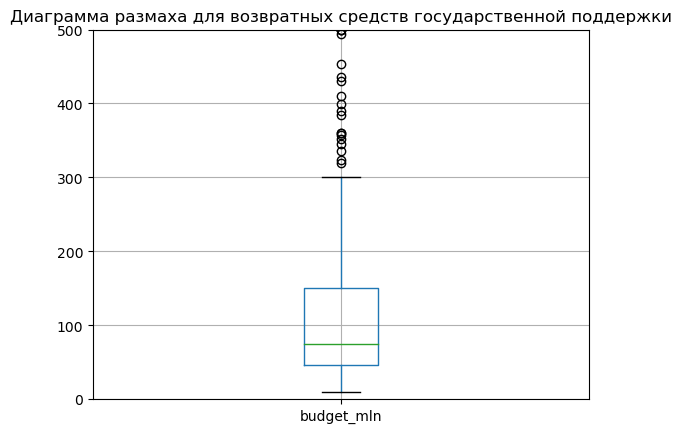

In [70]:
data_unique.boxplot('budget_mln')
plt.title('Диаграмма размаха для возвратных средств государственной поддержки')
plt.ylim(0, 500)
plt.show()

Все значения выше верхнего уса (выше 300) считаем аномальными.  
Посмотрим какой процент составляют аномальные значения

In [71]:
budget_anom = len(data_unique.loc[data_unique['budget_mln'] >300])
display('Аномальные значения составляют {:.1%}'. format(budget_anom / len_support))

'Аномальные значения составляют 8.8%'

Так как аномальные значения составляют почти 9% и скорее всего не являются ошибкой при сборе данных, оставим столбец без изменений.

##### Сборы в рублях

Посмотрим на подробную информацию о данных

In [72]:
data_unique['box_office'].describe()

count           3,027.00
mean       75,392,839.84
std       237,344,584.52
min                 0.00
25%           119,359.50
50%         2,418,702.00
75%        23,608,211.37
max     3,073,568,690.79
Name: box_office, dtype: float64

Для удобства приведем столбец к миллионам и отразим это в названии столбца

In [73]:
data_unique['box_office'] = (data_unique['box_office']/1000000*1.0).round()

In [74]:
data_unique.rename(columns={'box_office': 'box_office_mln'}, inplace=True)
data_unique['box_office_mln'].describe()

count   3,027.00
mean       75.38
std       237.35
min         0.00
25%         0.00
50%         2.00
75%        24.00
max     3,074.00
Name: box_office_mln, dtype: float64

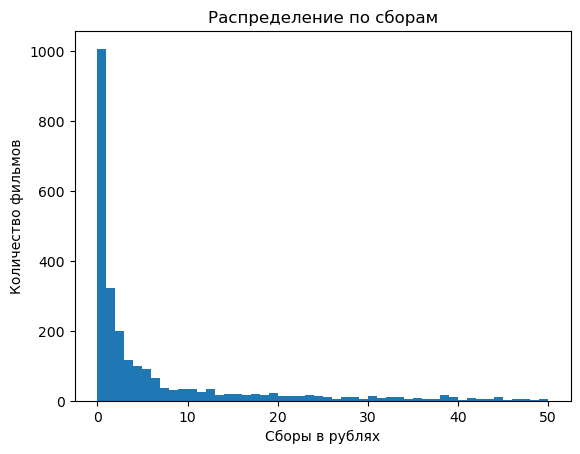

In [75]:
plt.hist(data_unique['box_office_mln'], bins=50, range=(0,50))
plt.title('Распределение по сборам')
plt.xlabel('Сборы в рублях')
plt.ylabel('Количество фильмов')
plt.show()

Посмотрим на количество фильмов с нулевыми сборами

In [76]:
display(data_unique[data_unique['box_office_mln'] == 0])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support_mln,nonrefundable_support_mln,budget_mln,financing_source,ratings,genres,box_office_mln
6,Любовь и голуби,111007013,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,unknown,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Независимое кино,8.30,"мелодрама,комедия",0.00
18,Неподдающиеся,111003616,2016-02-12,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Независимое кино,8.00,"мелодрама,комедия",0.00
19,Неподсуден,111003716,2016-02-12,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Независимое кино,7.70,драма,0.00
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Независимое кино,8.70,"комедия,мелодрама,криминал",0.00
38,Мужики!..,111007213,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,И.Бабич,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Независимое кино,8.10,драма,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7436,Встреча с Горбачевым,126007719,2019-12-03,Прочие,Вернер Херцог Фильмпродуцион,"Германия,Великобритания,США",Вернер Херцог,"Светлана Палмер, Луки Стипетич",«16+» - для детей старше 16 лет,NaN,NaN,NaN,Независимое кино,6.60,"документальный,биография,история",0.00
7437,Зверь,121035919,2019-12-05,Художественный,Студио энд Нью,ЮжнаяКорея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,Независимое кино,6.50,"триллер,драма",0.00
7456,Шарнохой - жёлтый пёс,111021819,2019-12-12,Художественный,"ООО Студия ""БурятКино""",Россия,Б.Дышенов,Б.Дышенов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,Независимое кино,NaN,unknown,0.00
7462,Небо измеряется милями,111021919,2019-12-19,Художественный,"ООО ""РБ ПРОДАКШН""",Россия,К.Буслов,К.Буслов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Независимое кино,6.50,"военный,история",0.00


1006 строк из 3158 это почти 30% данных. Возможные причины нулевых значений не ясны. Данные могли не публиковаться или фильмы еще находятся в процессе сборов. Найти релевантные значения и заменить ими нулевые мы не можем, поэтому оставим данные как есть.

Построим диаграмму размаха.

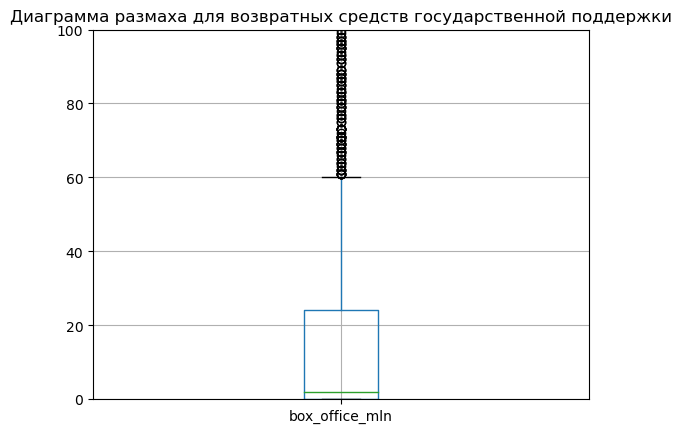

In [77]:
data_unique.boxplot('box_office_mln')
plt.title('Диаграмма размаха для возвратных средств государственной поддержки')
plt.ylim(0, 100)
plt.show()

Все значения выше верхнего уса, то есть 300 считаем аномальными.  
Посмотрим какой процент составляют аномальные значения

In [78]:
box_anom = len(data_unique.loc[data_unique['box_office_mln'] >60])
box_notna = len(data_unique.loc[data_unique['box_office_mln'].notna()])
display('Аномальные значения составляют {:.1%}'. format(box_anom / box_notna))

'Аномальные значения составляют 17.1%'

Так как аномальные значения составляют 17% и скорее всего не являются ошибкой при сборе данных, оставим столбец без изменений.

##### Вывод по количественным значениям

В результате работы были выявлены и устранены слудующие проблемы

-  **ratings** обнаружили разный формат (проценты и десятичные значения), привели к единому виду. Распределение значений нормальное, пропуски оставили без изменений

- **refundable_support**, **nonrefundable_support**, **budget**, **box_office** для удобства привели значения к миллионам, отразив это в названиях столбцов. Проверили данные на наличие выбросов. Определили аномальные значения, но так как их количество около или больше 10% решили их оставить для дальнейшего исследования. Пропуски оставили без изменений.

- **budget** обнаружили строки с ошибками: часть строк содержала значения 0, в то время как столбцы с возвратными и невозвратными средствами были выше 0. Исправили эти нулевые значения, заполнив их медианным значением, узнав какую долю обычно составляет гос поддержка от общего бюджета фильма.

- **box_office** обнаружили, что 30% данных содержат нулевые значения, предположили причину и оставили данные без изменений.


#### Шаг 2.6. Добавляем новые столбцы





- Создаем столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [79]:
data_unique['show_start_year'] = pd.to_datetime(data_unique['show_start_date']).dt.year

In [80]:
data_unique.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support_mln,nonrefundable_support_mln,budget_mln,financing_source,ratings,genres,box_office_mln,show_start_year
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,Независимое кино,7.20,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Независимое кино,6.60,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Независимое кино,6.80,"фантастика,боевик,триллер",NaN,2016
5,Остановился поезд,111013816,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Независимое кино,7.70,драма,NaN,2016
6,Любовь и голуби,111007013,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,unknown,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Независимое кино,8.30,"мелодрама,комедия",0.00,2013


- Создаем два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.


Создаем общую функцию 

In [81]:
def add_first(data_unique, columns):
    for column in columns:
        data_unique[f'first_{column}'] = data_unique[column].str.split(',').str[0]
    return data_unique

In [82]:
#добавляем столбец с первым режиссером
data_unique = add_first(data_unique, ['director'])

In [83]:
#добавляем столбец с первым жанром
data_unique = add_first(data_unique, ['genres'])

In [84]:
data_unique.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support_mln,nonrefundable_support_mln,budget_mln,financing_source,ratings,genres,box_office_mln,show_start_year,first_director,first_genres
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,Независимое кино,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Независимое кино,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,Независимое кино,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
5,Остановился поезд,111013816,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,unknown,«6+» - для детей старше 6 лет,NaN,NaN,NaN,Независимое кино,7.70,драма,NaN,2016,В.Абдрашитов,драма
6,Любовь и голуби,111007013,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,unknown,«12+» - для детей старше 12 лет,NaN,NaN,NaN,Независимое кино,8.30,"мелодрама,комедия",0.00,2013,В.Меньшов,мелодрама


- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [85]:
data_unique['percent_of_support'] = (((data_unique['refundable_support_mln'] + data_unique['nonrefundable_support_mln']) \
                                      / data_unique['budget_mln']) * 100).round(0)

In [86]:
data_unique.dropna(subset=['percent_of_support'])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support_mln,nonrefundable_support_mln,budget_mln,financing_source,ratings,genres,box_office_mln,show_start_year,first_director,first_genres,percent_of_support
1281,Пока еще жива,111005313,2013-10-11,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26.00,79.00,Министерство культуры,8.10,"драма,мелодрама",0.00,2013,А.Атанесян,драма,33.00
1448,Бесславные придурки,111003314,2014-03-28,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,26.00,37.00,Министерство культуры,NaN,unknown,0.00,2014,А.Якимчук,unknown,70.00
1498,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,108.00,176.00,Фонд кино,5.30,"комедия,фантастика",20.00,2013,Р.Давлетьяров,комедия,61.00
1524,БЕРЦЫ,111004314,2014-05-05,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,28.00,41.00,Министерство культуры,4.20,драма,0.00,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,68.00
1792,Братья Ч,111004414,2014-04-23,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,25.00,40.00,Министерство культуры,6.40,драма,0.00,2014,М.Угаров,драма,62.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,Союз спасения,111022019,2019-12-26,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100.00,400.00,980.00,Фонд кино,6.00,"история,биография,драма",718.00,2019,А.Кравчук,история,51.00
7465,Иван Царевич и Серый Волк 4,114005019,2019-12-20,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100.00,0.00,190.00,Фонд кино,6.70,"мультфильм,приключения,семейный",501.00,2019,Д.Шмидт,мультфильм,53.00
7473,Вторжение,111022519,2019-12-23,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100.00,400.00,944.00,Фонд кино,5.70,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,53.00
7475,Я свободен,111023019,2019-12-26,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,30.00,46.00,Министерство культуры,5.90,драма,NaN,2019,И.Северов,драма,65.00


#### Вывод

По итогу данного этапа мы имеем новый датафрейм **data_unique** с более качественными данными.  

Мы сохранили больше 90% информации и удалили пропуски в большинстве столбцов.

Подробнее о проделанной работе:

***Тип данных***

- **show_start_date** изменили на Datetime
- **ratings** изменили на float

***Пропуски***

- **film_studio** заполнили пропуски unknown
- **production_country** заполнили пропуски unknown
- **financing_source** заполнили пропуски "Независимое кино"
- **genres** заполнили пропуски unknown
- пропуски в столбцах, содержащих информацию о гос поддержке и прокате решили не удалять

***Дубли***

- **title** удалили дубликаты фильмов, отсортировав по названию, типу, стране, режиссере, рейтингу и жанру
- **type** удалили дубли в названиях типов фильмов, убрав лишние пробелы
- **production_country** удалили дубли, убрав лишние пробелы, заменив разделительные символы и ошибочные значения

***Изменили количественные данные***

- **ratings** исправили значения в процентах, привели к единому формату
- **refundable_support_mln** перевели значения в миллионы
- **nonrefundable_support_mln** перевели значения в миллионы
- **budget** исправили некорректные нулевые значения, заполнив их медианой, узнав какую долю обычно составляет гос поддержка от общего бюджета фильма.
- **box_office_mln** перевели значения в миллионы

***Добавили новые столбцы***

- **show_start_year** с информацией о годе проката
- **first_director** с именем и фамилией главного режиссёра
- **first_genres** с основным жанром фильма
- **percent_of_support** с долей государственной поддержкой от общего бюджета фильма

***Общие проблемы категориальны значений***

Большинство столбцов с категориальными значениями имеют схожие проблемы в данных: 
- неявные дубликаты (Вибеке Винделев/ Вибеке Винделов), 
- лишние пробелы и символы в строках, 
- разный стиль записей,
  -  режиссеры и продюссеры то в сокращенном варинте с инициалами, то с полным ФИО
- большое количество уникальных значий из-за перечислений в строке не позволит сгруппировать информацию в дальнейшем

В большинстве случаев исправить подобные ошибки в ручную невозможно из-за большого объема. 
Часть данных мы исправили, удалив пробелы и символы.
Информацию о режиссерах и жанрах мы решили созданием новых столбцов, в которые войдут первые значения (до запятой) из строк.
Сделать данные более удобными для анализа помогло бы автозаполнение значений в источнике из ратифицированной базы данных режиссеров, студий-производителей, жанров и т.д.

***Прочие наблюдения***

- в столбце с общим бюджетом фильма были найдены строки с ошибочными нулевыми значениями, так как в них были указаны суммы государственной поддержки. Что говорит от отсутсвии связи этих полей при сборе данных.

- часть информации отсутвует по неявным причинам, например сборы в рублях для 30% фильмов учатсвующих в прокате.



### Шаг 3. Исследовательский анализ данных


-  Посмотрим, сколько фильмов выходило в прокат каждый год
-  Посчитайем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах
-  Проанализируем, как эта доля менялась по годам
-  Сделайем вывод о том, какой период полнее всего представлен в данных

Посчитаем общую долю в процентах фильмов с указанной информацией о прокате в кинотеатрах

In [87]:
display(f'Доля фильмов, с указанной информацией о прокате в кинотеатрах \
составляет: {data_unique.box_office_mln.notna().mean().round(2) * 100} %')


'Доля фильмов, с указанной информацией о прокате в кинотеатрах составляет: 44.0 %'

Разобъем по годам и посмотрим как менялась доля фильмов с указанной информацией о прокате в кинотеатрах

In [89]:
data_box_pivot = data_unique.pivot_table('box_office_mln' , index = ['show_start_year'], aggfunc = ['count'])
data_box_pivot.columns = ['Фильмов в прокате']
data_box_pivot['Фильмов всего'] = data_unique.pivot_table('title' , index = ['show_start_year'], aggfunc = ['count'])
data_box_pivot['Процент проката'] = data_box_pivot['Фильмов в прокате'] / data_box_pivot['Фильмов всего']  * 100
data_box_pivot

,Фильмов в прокате,Фильмов всего,Процент проката
show_start_year,,,
2010,88,762,11.55
2011,98,477,20.55
2012,116,517,22.44
2013,176,590,29.83
2014,257,729,35.25
2015,431,661,65.20
2016,501,771,64.98
2017,357,500,71.40
2018,474,884,53.62


Больший процент фильмов выходящих в прокат наблюдается в 2017 году и составляет более 71%.  
Наименьший процент - в 2010 году 11,5%.  
Начиная с 2010 года заметен рост выходов в прокат.  
После 2017 года заметен резкий спад (почти на 18 процентных пунктов) с последующим ростом.  

Полнее всего представлен период с 2014 по 2019 год.

Построим для наглядности график

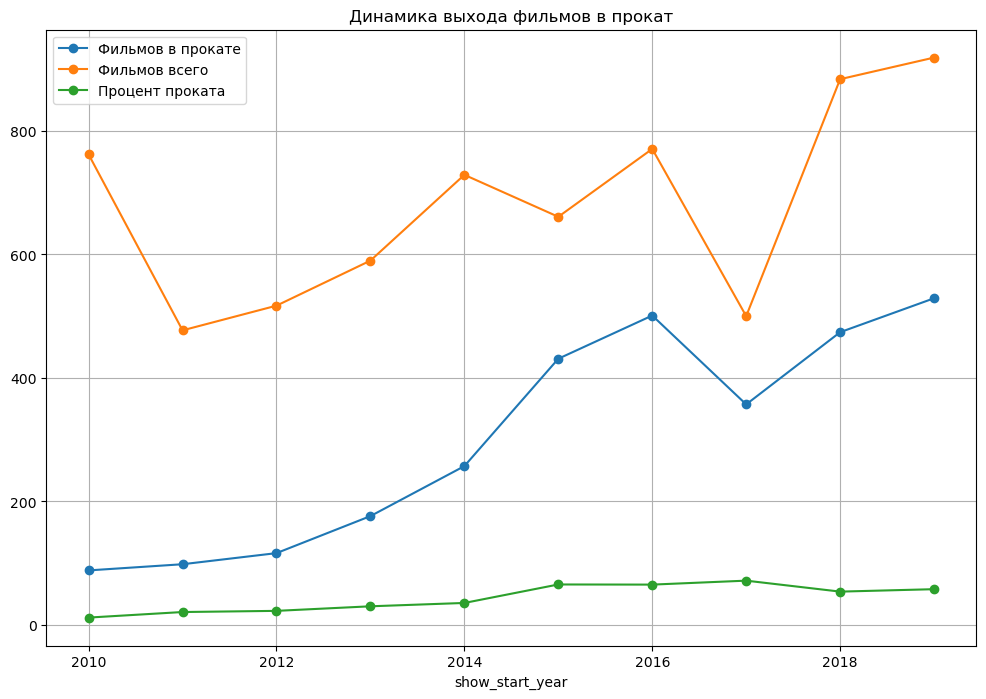

In [91]:
data_box_pivot.plot(title='Динамика выхода фильмов в прокат', \
                grid=True, style='o-', figsize=(12, 8), \
                y=['Фильмов в прокате', 'Фильмов всего', 'Процент проката'])
plt.show()

На графике заметен резкий спад по количеству произведенных фильмов и выпущенных в прокат в 2017 году.  
И снижение **доли** фильмов выходящих в прокат в последующие после 2017 годы.  
Можем сделать вывод, что имели место быть внешние факторы влияющие на киноиндустрию.

Так, например, в статье https://www.kinopoisk.ru/media/article/3019510/   
"Холодное лето 2017-го: Кинобизнес на грани нервного срыва" на Кинопоиске 
в причинах падения индустрии приводятся следующие факторы:

1. снижение интереса зрителей к просмотру кино в кинотеатрах
2. выходы сиквелов: зритель становится все разборчивее и понимает, что фильм с цифрами в названии может оказаться точной копией предыдущего как минимум по сюжету, и не идет в кино.
3. популярность сериалов, например "Очень странные дела"  и "Игра престолов"
4. развитие стриминговых платформ



- Изучим, как менялась динамика проката по годам. Найдем год с минимальной и максимальной сумма сборов.
- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

Так как ранее мы заметили, что около 30% фильмов, выходящих в прокат не имеют информацию о суммах сбора в рублях, то  
выберем значения в столбце с суммой проката выше ноля и посмотрим подробно на значения.

In [92]:
data_box_office_pivot=data_unique.query('box_office_mln > 0') \
.pivot_table(index='show_start_year', values='box_office_mln', aggfunc = ['count','sum','median', 'mean'])

data_box_office_pivot.columns = ['count','sum','median', 'mean']
data_box_office_pivot.sort_values('sum', ascending=False)

,count,sum,median,mean
show_start_year,,,,
2017,321,"48,556.00",14.00,151.26
2019,470,"48,417.00",6.00,103.01
2018,434,"47,989.00",12.00,110.57
2016,383,"43,722.00",10.00,114.16
2015,334,"32,075.00",11.00,96.03
2014,69,"7,363.00",6.00,106.71
2013,4,26.00,2.50,6.50
2011,2,13.00,6.50,6.50
2012,3,4.00,1.00,1.33


В данной таблице помимо количества выходящих фильмов и общего количества сборов наглядно продемонстрирована разница между медианным и средним значением.

Значение медианы не чувствительно к аномальным значением (значительно выше и ниже большинства), а так же к общему количеству значений, и равномерно распределенно от года к году, даже учитывая года периода 2010 - 2013, где количество фильмов минимально. 
Так, например, мы можем сделать вывод, что один медианный фильм в 2011 году собрал больше средств (6,5), чем в 2019 (6).

Среднее же значение учитывает фильмы, которые были сильно успешнее большинства. И чем больше количество таких фильмов, тем сильнее будет отличие от медианы. Мы можем заметить эту разницу по 2014 году, когда количество фильмов резко возрасло.

Для дальнейшего исследования будем обращать внимание на оба значения, но для графиков, где необходимо будет учитывать весь объем выходящих фильмов, будем обращаться к среднему значению.

Построим график для нагладности

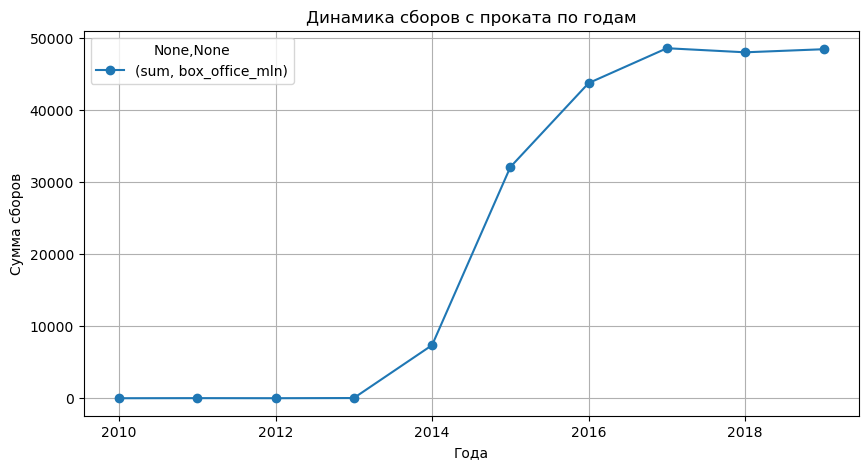

In [93]:
(
    data_unique.query('box_office_mln > 0')
    .pivot_table(index='show_start_year', values='box_office_mln', aggfunc = ['sum'])
    .plot(grid=True, style='o-', figsize=(10, 5))
)
plt.title('Динамика сборов с проката по годам')
plt.xlabel('Года')
plt.ylabel('Сумма сборов')
plt.show()

Начиная с 2014 года виден значительный рост по сборам и выход на плато в 2017 году.  
Год с минимальной суммой сборов, медианным и средним значением - 2010.  
Год с максимальной суммой сборов, медианным и средним значением - 2017.

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Посмотрим на сводную таблицу с разбивкой значений по возрастным категориям

In [94]:
data_age_pivot=data_unique.query('box_office_mln > 0') \
.pivot_table(index='age_restriction', values='box_office_mln', aggfunc = ['count','sum','median', 'mean'])

data_age_pivot.columns = ['count','sum','median', 'mean']
data_age_pivot.sort_values('sum', ascending=False)

,count,sum,median,mean
age_restriction,,,,
«16+» - для детей старше 16 лет,673,"69,472.00",10.00,103.23
«12+» - для детей старше 12 лет,278,"61,480.00",18.50,221.15
«6+» - для детей старше 6 лет,284,"57,218.00",29.00,201.47
«18+» - запрещено для детей,712,"38,923.00",8.00,54.67
«0+» - для любой зрительской аудитории,74,"1,073.00",4.00,14.50


Лидерами по сборам являются фильмы категории «16+», меньше всего сборы у категории «0+».  
Но если мы посмотрим на количество фильмов и вниматлельно изучим средние и медианные значения, то увидим,
что успешнее в прокате в прокате фильмы «12+» и «6+».  
Фильмы «18+» собирают средств в прокате меньше остальных категорий, хотя являются лидерами по количеству.  
Фильмы «0+» и выходят в прокат реже и собирают мало.


Построим график с динамикой по годам за период с 2015 года по 2019 год.
Для точности исследования возьмем не общую сумму по сборам (так как оно зависит от количества фильмов), а среднее значение.

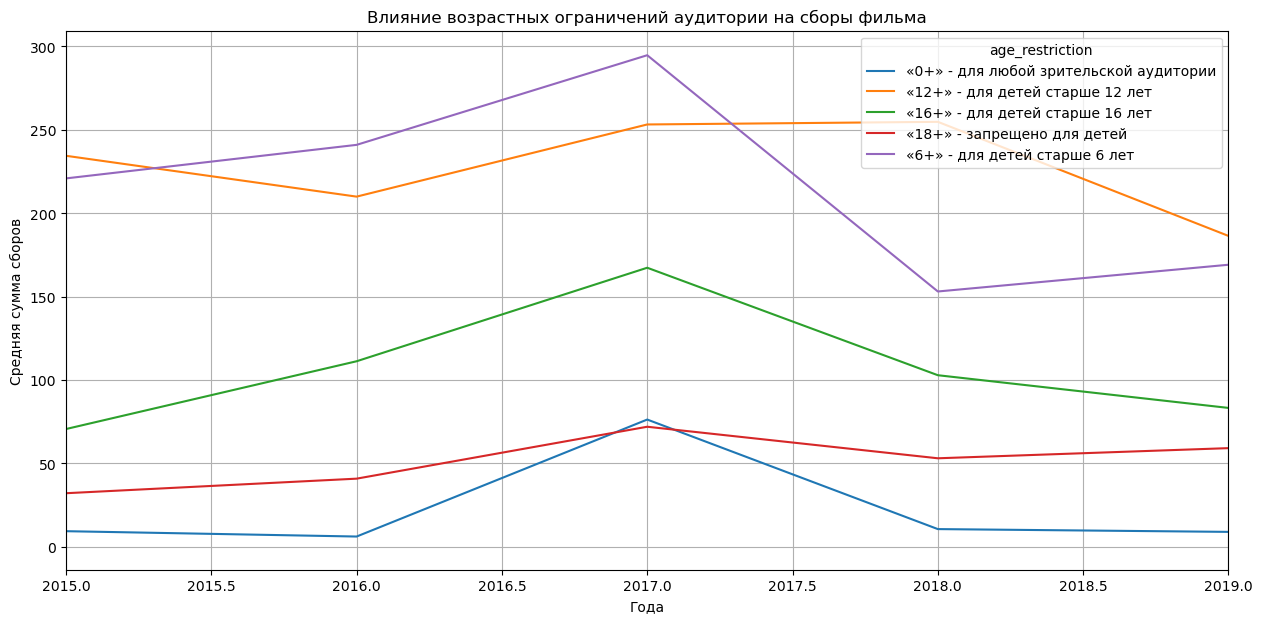

In [95]:
data_age_pivot = data_unique.query('box_office_mln > 0') \
.pivot_table(index='show_start_year', columns='age_restriction', values='box_office_mln', aggfunc = 'mean') \
.plot(kind='line',figsize=(15, 7), grid=True, xlim=[2015, 2019])
plt.title('Влияние возрастных ограничений аудитории на сборы фильма')
plt.xlabel('Года')
plt.ylabel('Средняя сумма сборов')
plt.show()

Ранее мы уже замечали падение показетелей по количеству выпускаемых фильмов и фильмов выходящих в прокат начиная с 2017 года.
Факторы, влиящие на это, очевидно повлияли и на сборы фильмов, что заметно по большинству возрастных категорий.
По графику можем заметить, что падение продолжалось с начала 2017 по 2018 год. Далее сборы для большинства категорий либо остановаились в падении либо замечается рост.


Расмотрим подробнее:

Ровнее всего на графике выглядит категория «18+». Заметна плавная тенденция к росту, объяснимая экономическими процессами (инфляция). После начала 2017 года наблюдается спад и возвращение к росту показателей после 2018 года.
Вывод: данная категория более устройчива к внешним факторам, влияющим на киноиндустрию в целом


В категориях «6+», «16+», «0+» спрад по сборам заметен сильнее, категория «6+» пострадала сильнее всего.

Категория «12+» с кризисом справилась иначе, сохранив свои позиции в рамках всего сложного периода 2017-2018. Возможно студии решили спасать индустрию, сделав упор именно на эту категорию, что вывело ее в лидеры по сборам. Последующие падение можем связать с перенасещением рынка и спаду интересов зрителей.

#### Вывод

Мы провели исследовательский анализ данных и изучили следующие параметры:

**Инфрмация о фильмах, выходящих в прокат**

Доля фильмов, с указанной информацией о прокате в кинотеатрах составляет: 44.0 %
    
Больший процент фильмов выходящих в прокат наблюдается в 2017 году и составляет более 71%.
Наименьший процент - в 2010 году 11,5%.
Начиная с 2010 года заметен рост выходов в прокат.
После 2017 года заметен резкий спад (почти на 18 процентных пунктов) с последующим ростом.

Полнее всего представлен период с 2014 по 2019 год.

На графиках был заметен резкий спад по количеству произведенных фильмов и выпущенных в прокат в 2017 году.
И снижение доли фильмов выходящих в прокат в последующие после 2017 годы.
Можем сделать вывод, что имели место быть внешние факторы влияющие на киноиндустрию.

Возможные из них:

- снижение интереса зрителей к просмотру кино в кинотеатрах
- выходы сиквелов: зритель становится все разборчивее и понимает, что фильм с цифрами в названии может оказаться точной копией предыдущего как минимум по сюжету, и не идет в кино.
- популярность сериалов, например "Очень странные дела" и "Игра престолов"
- развитие стриминговых платформ

**Инфрмация о суммах сборов**


Начиная с 2014 года виден значительный рост по сборам и выход на плато в 2017 году.  
Год с минимальной суммой сборов, медианным и средним значением - 2010.  
Год с максимальной суммой сборов, медианным и средним значением - 2017.

**Сборы и возрастные ограничения** 


Лидерами по сборам являются фильмы категорий “16+”, но успешнее в прокате - фильмы “12+” и “6+”.   
Несмотря на то, что фильмы “0+” выходят в прокат реже, они также собирают мало средств.   
Заметно падение показателей по количеству выпускаемых и выходящих в прокат фильмов, начиная с 2017 года, на которое повлияли различные факторы, и это отразилось на сборах фильмов.   
Ровнее всего на графике сборов выглядит категория “18+”. Возможно
данная категория более устройчива к внешним факторам, влияющим на киноиндустрию в целом.

Сильнее всего в кризисный 2017-2018 период пострадала категория «6+».
Категория «12+» с кризисом справилась иначе, сохранив свои позиции. Возможно студии решили спасать индустрию, сделав упор именно на эту категорию, что вывело ее в лидеры по сборам. Последующие падение можем связать с перенасещением рынка и спаду интересов зрителей.


### Шаг 4. Исследуем фильмы, которые получили государственную поддержку


- Изучим, как менялись значения по году
- Есть ли лидеры среди жанров и режиссеров
- Из какого источника поступает больше всего гос поддержки
- Изучим успешность фильмов
- Подробнее посмотрим на суммы возвратных и невозвратных средств

Создадим переменную, куда войдут все фильмы получившие гос поддержку

In [96]:
data_gos_budget = data_unique[data_unique['budget_mln'].notna()]
data_gos_budget

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support_mln,nonrefundable_support_mln,budget_mln,financing_source,ratings,genres,box_office_mln,show_start_year,first_director,first_genres,percent_of_support
1281,Пока еще жива,111005313,2013-10-11,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26.00,79.00,Министерство культуры,8.10,"драма,мелодрама",0.00,2013,А.Атанесян,драма,33.00
1448,Бесславные придурки,111003314,2014-03-28,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,26.00,37.00,Министерство культуры,NaN,unknown,0.00,2014,А.Якимчук,unknown,70.00
1498,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,108.00,176.00,Фонд кино,5.30,"комедия,фантастика",20.00,2013,Р.Давлетьяров,комедия,61.00
1524,БЕРЦЫ,111004314,2014-05-05,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,28.00,41.00,Министерство культуры,4.20,драма,0.00,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,68.00
1792,Братья Ч,111004414,2014-04-23,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,25.00,40.00,Министерство культуры,6.40,драма,0.00,2014,М.Угаров,драма,62.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,Союз спасения,111022019,2019-12-26,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100.00,400.00,980.00,Фонд кино,6.00,"история,биография,драма",718.00,2019,А.Кравчук,история,51.00
7465,Иван Царевич и Серый Волк 4,114005019,2019-12-20,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100.00,0.00,190.00,Фонд кино,6.70,"мультфильм,приключения,семейный",501.00,2019,Д.Шмидт,мультфильм,53.00
7473,Вторжение,111022519,2019-12-23,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100.00,400.00,944.00,Фонд кино,5.70,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,53.00
7475,Я свободен,111023019,2019-12-26,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,30.00,46.00,Министерство культуры,5.90,драма,NaN,2019,И.Северов,драма,65.00


Создадим столбец, в который войдут значения суммы возвратных и невозвратных стредств гос поддержки

In [97]:
data_gos_budget['support_mln'] = data_gos_budget['refundable_support_mln'] + data_gos_budget['nonrefundable_support_mln']

**Посмотрим в каком году было выдано больше всего гос поддержки**

Выведем сводную таблицу по годам с количеством и суммой гос поддержки

In [98]:
data_gos_budget_years = data_gos_budget.pivot_table(index='show_start_year', values='support_mln', aggfunc = ['count', 'sum'])
data_gos_budget_years.columns = ['count','sum']
data_gos_budget_years.sort_values('sum', ascending=False)

,count,sum
show_start_year,,
2019,69,"4,874.00"
2016,61,"4,304.00"
2015,86,"3,657.00"
2018,56,"3,447.00"
2017,41,"3,183.00"
2014,16,572.00
2013,2,134.00


Построим столбчатый график с суммой гос поддержки по годам

<Axes: title={'center': 'Объем государственной поддержки по годам'}, xlabel='show_start_year'>

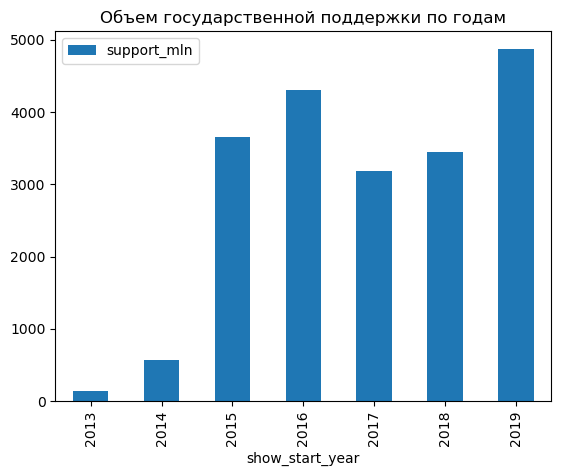

In [102]:
data_gos_budget.pivot_table(index='show_start_year', values='support_mln', aggfunc = 'sum') \
.plot(title='Объем государственной поддержки по годам', kind='bar')

Построим столбчатый график с количеством фильмов с гос поддержкой по годам

<Axes: title={'center': 'Количество фильмов с  государственной поддержкой по годам'}, xlabel='show_start_year'>

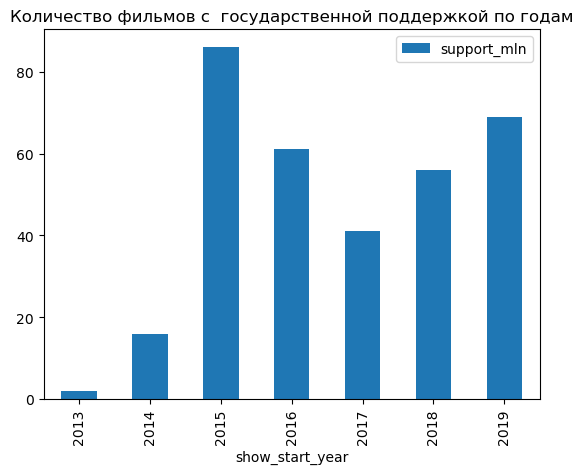

In [103]:
data_gos_budget.pivot_table(index='show_start_year', values='support_mln', aggfunc = 'count') \
.plot(title='Количество фильмов с  государственной поддержкой по годам', kind='bar')

И по количеству и по сумме заметен спад в 2017 году.  
Пиком по количеству фильмов с гос поддержкой стал год 2015.  
Больше всего гос бюджета на фильмы было потрачено в 2019 году - 4 874 000 000 рублей.

**Посмотрим какие жанры получают больше государственной поддержки**

<Axes: title={'center': 'Количество фильмов с  государственной поддержкой по жанрам'}, xlabel='first_genres'>

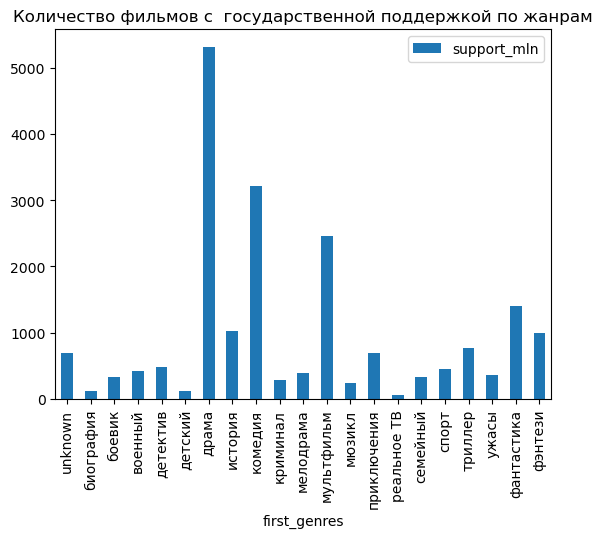

In [104]:
data_gos_budget.pivot_table(index='first_genres', values='support_mln', aggfunc = 'sum') \
.plot(title='Количество фильмов с  государственной поддержкой по жанрам', kind='bar')

В стройку лидеров входят драма, комедия и мультфильм.

**Изучим какие режиссеры чаще получали государственную поддержку**

In [105]:
data_gos_budget['first_director'].value_counts().head(15)

first_director
Р.Давлетьяров    5
С.Андреасян      4
Д.Дьяченко       4
Н.Хомерики       3
А.Котт           3
Д.Шмидт          3
А.Аксененко      3
С.Мокрицкий      3
А.Цицилин        3
К.Шипенко        3
Н.Джорджадзе     2
А.Якимчук        2
А.Федорченко     2
А.Меликян        2
Д.Тюрин          2
Name: count, dtype: int64

Режиссер Р.Давлетьяров - лидер по проектам с государственным финансированием. Второе место делят С.Андреасян и Д.Дьяченко.

**Изучим данные по источнику государственного финансирования**

Выведем сводную таблицу по источникам финансирования с суммой возратных, невозвратных и общих средств

In [106]:
data_gos_budget.pivot_table(index='financing_source', \
values=['support_mln','refundable_support_mln', 'nonrefundable_support_mln'], aggfunc = 'sum')

,nonrefundable_support_mln,refundable_support_mln,support_mln
financing_source,,,
Министерство культуры,"4,807.00",0.00,"4,807.00"
"Министерство культуры, Фонд кино",860.00,325.00,"1,185.00"
Фонд кино,"10,565.00","3,614.00","14,179.00"


Построим график

<Axes: title={'center': 'Объем государственной поддержки по источнику гос финансирования'}, xlabel='financing_source'>

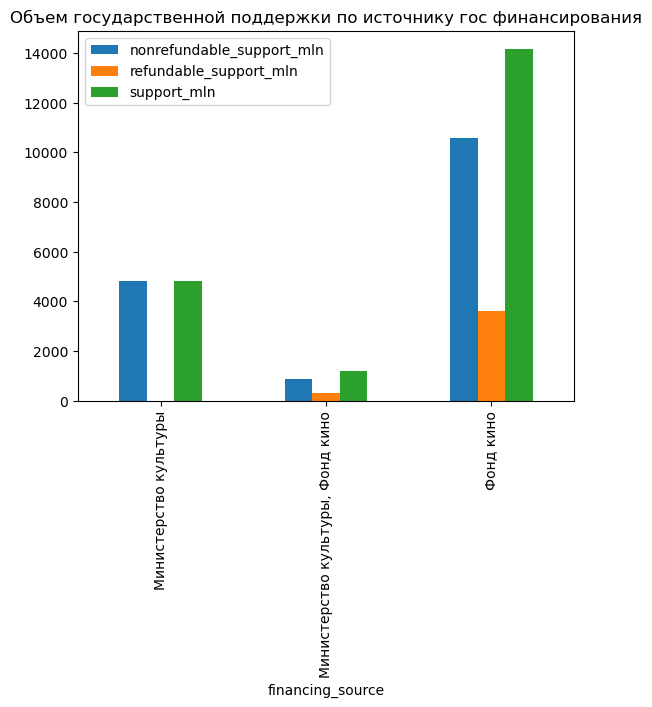

In [107]:
data_gos_budget.pivot_table(index='financing_source', \
values=['support_mln','refundable_support_mln', 'nonrefundable_support_mln'], aggfunc = 'sum') \
.plot(title='Объем государственной поддержки по источнику гос финансирования', kind='bar')

Лидером по госудадственному финансированию является "Фонд кино", выдавший в общей сумме 14 179 000 000 рублей.  
Так же можем заметить что большая часть выданных средств - невозвратная.  
Министерство культуры выдало 4 807 000 000 рублей невозвратных средств.

**Изучим успешность фильмов, оценив окупаемость и рейтинг**

In [110]:
display(f'Средний рейтинг фильмов с гос поддержкой составляет: {data_gos_budget.ratings.median()}')
display(f'Средний рейтинг всех фильмов составляет: {data_unique.ratings.median()}')

'Средний рейтинг фильмов с гос поддержкой составляет: 6.2'

'Средний рейтинг всех фильмов составляет: 6.6'

В среднем фильмы с гос поддержкой по рейтингу немного уступают Независимому кино.

Создадим столбец с указанием окупаемости в значение True

In [111]:
data_gos_budget['paid_off'] = data_gos_budget['box_office_mln'] >= data_gos_budget['support_mln']

Посчитаем процент окупившихся фильмов

In [112]:
data_paid_off = data_gos_budget[data_gos_budget['paid_off'] == True]
display('Процент окупившихся фильмов среди получивших гос поддержку составляет {:.1%}'. format(len(data_paid_off) / len(data_gos_budget)))

'Процент окупившихся фильмов среди получивших гос поддержку составляет 35.6%'

Посмотрим какие жанры из окупившихся собирают больше средств в прокате

<Axes: title={'center': 'Сборы окупившихся фильмов с  государственной поддержкой по жанрам'}, xlabel='first_genres'>

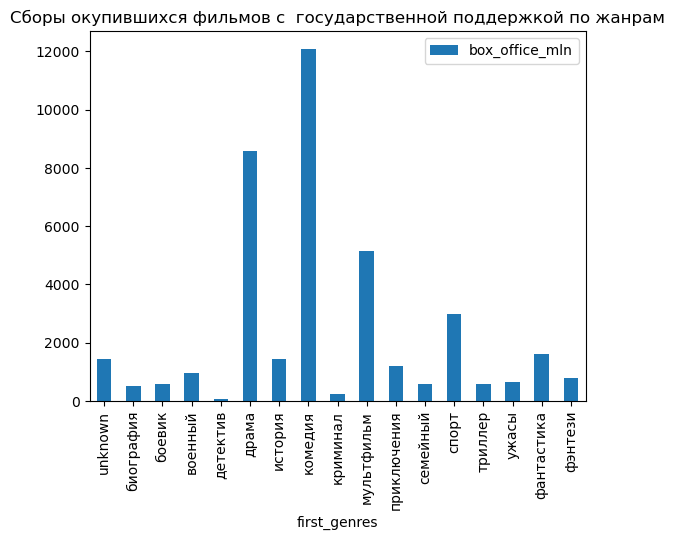

In [113]:
data_paid_off.pivot_table(index='first_genres', values='box_office_mln', aggfunc = 'sum') \
.plot(title='Сборы окупившихся фильмов с  государственной поддержкой по жанрам', kind='bar')

В тройку лидеров входят жанры: комедия, драма и мультфильмы.

**Изучим подробнее возвратные средства гос финансирования**

In [114]:
data_gos_budget['refundable_support_mln'].describe()

count   331.00
mean     11.90
std      24.95
min       0.00
25%       0.00
50%       0.00
75%      15.00
max     180.00
Name: refundable_support_mln, dtype: float64

Посмотрим на диаграмму размаха

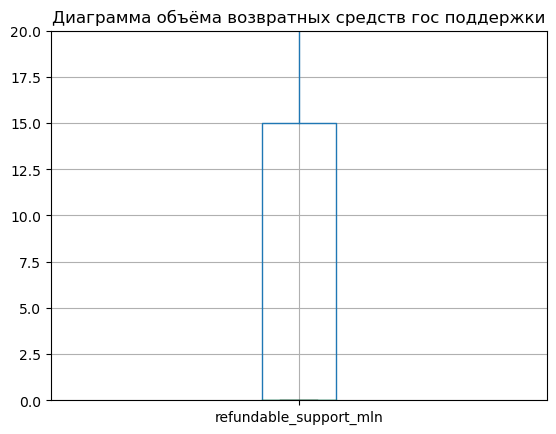

In [115]:
data_gos_budget.boxplot('refundable_support_mln')
plt.title('Диаграмма объёма возвратных средств гос поддержки')
plt.ylim(0, 20)
plt.show()

Довольно много нолей в этом столбце.  
Посмотрим какой процент фильмов, получивших гос поддержку, входит в число тех, что должны вернуть средства в том или ином объеме.  

In [116]:
gos_return = data_gos_budget[data_gos_budget['refundable_support_mln'] > 0]

In [117]:
gos_return['refundable_support_mln'].describe()

count   111.00
mean     35.49
std      31.97
min       4.00
25%      15.00
50%      25.00
75%      50.00
max     180.00
Name: refundable_support_mln, dtype: float64

In [118]:
display('Процент фильмов с возвртной гос поддержкой составляет {:.1%} от общего числа фильмов с гос финансированием'
        . format(len(gos_return) / len(data_gos_budget)))

'Процент фильмов с возвртной гос поддержкой составляет 33.5% от общего числа фильмов с гос финансированием'

Посмотрим на распределение значений больше ноля на гистограмме

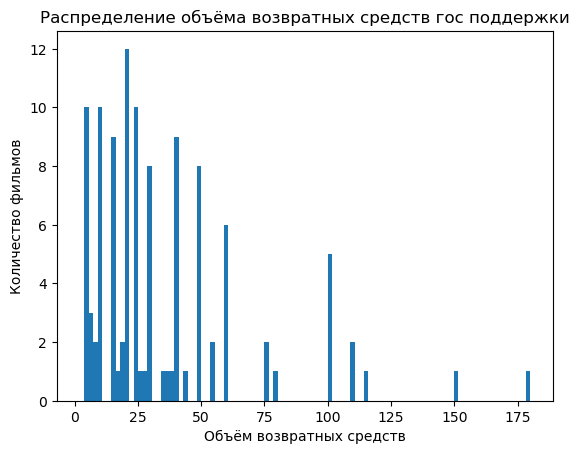

In [119]:
plt.hist(data_gos_budget['refundable_support_mln'], bins=100, range=(2,180))
plt.title('Распределение объёма возвратных средств гос поддержки')
plt.xlabel('Объём возвратных средств')
plt.ylabel('Количество фильмов')
plt.show()

Наименьшее число возвратных средств гос поддержки составляет 3 500 000 руб., а наибольшее 180 000 000 руб.  
Медианная сумма возвратных средств гос поддержки - 25 000 000 руб.

**Изучим подробнее невозвратные средства гос финансирования**

In [120]:
data_gos_budget['nonrefundable_support_mln'].describe()

count   331.00
mean     49.04
std      60.06
min       0.00
25%      25.00
50%      30.00
75%      41.00
max     400.00
Name: nonrefundable_support_mln, dtype: float64

Посмотрим на диаграмму размаха

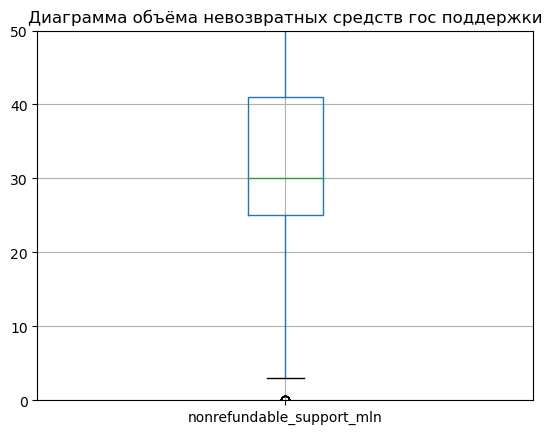

In [121]:
data_gos_budget.boxplot('nonrefundable_support_mln')
plt.title('Диаграмма объёма невозвратных средств гос поддержки')
plt.ylim(0, 50)
plt.show()

Посмотрим на распределение значений на гистограмме

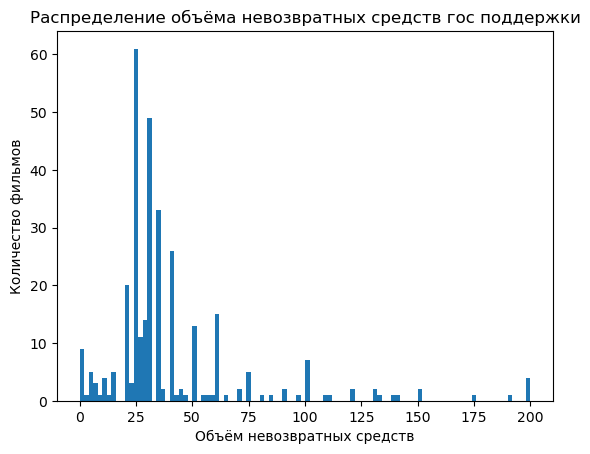

In [122]:
plt.hist(data_gos_budget['nonrefundable_support_mln'], bins=100, range=(0,200))
plt.title('Распределение объёма невозвратных средств гос поддержки')
plt.xlabel('Объём невозвратных средств')
plt.ylabel('Количество фильмов')
plt.show()

Наименьшее число невозвратных средств гос поддержки составляет 2 500 000 руб., а наибольшее 400 000 000 руб.  
Медианная сумма возвратных средств гос поддержки - 30 000 000 руб.

#### Вывод

Мы провели анализ фильмов получивших государственное финансирование.

**Государственное финансирование по годам**

И по количеству фильмов и по сумме финансирования заметен спад в 2017 году.
Пиком по количеству фильмов с гос поддержкой стал год 2015.
Больше всего гос бюджета на фильмы было потрачено в 2019 году - 4 874 000 000 рублей.

**Государственное финансирование по жанрам и режиссерам**

Больше всего государственной поддержки получили жанры драма, комедия и мультфильм.
Режиссер Р.Давлетьяров - лидер по проектам с государственным финансированием. Второе место делят С.Андреасян и Д.Дьяченко.

**Государственное финансирование по источнику**
Лидером по госудадственному финансированию является "Фонд кино", выдавший в общей сумме 14 179 000 000 рублей.
Так же можем заметить что большая часть выданных средств - невозвратная.
Министерство культуры выдало 4 807 000 000 рублей невозвратных средств.

**Успешность фильмов с государственным финансированием**

Средний рейтинг фильмов с гос поддержкой составляет 6.1, что не сильно отличается от средний рейтинг всех остальных фильмов (6.4).

Процент окупившихся фильмов среди получивших гос поддержку составляет 35.6%.
В тройку лидеров входят жанры: комедия, драма и мультфильмы.

**Возвратные и невозвратные средства**

Процент фильмов с возвртной гос поддержкой составляет 33.5% от общего числа фильмов с гос финансированием.

Наименьшее число возвратных средств гос поддержки составляет 3 500 000 руб., а наибольшее 180 000 000 руб.  
Медианная сумма возвратных средств гос поддержки - 25 000 000 руб.

Наименьшее число невозвратных средств гос поддержки составляет 2 500 000 руб., а наибольшее 400 000 000 руб.
Медианная сумма возвратных средств гос поддержки - 30 000 000 руб.

### Шаг 5. Общий вывод

В ходе исследования была проделана следующая работа и составлены выводы:

1. Изучена общая информация о данных

  -  Объем исследуемого датасета насчитывает 7485 записей и 16 параметра, что вполне достаточно для качественного исследования. Данные представлены в разных форматах (числовых и текстовых значениях). Анализ данных выявил наличие пропусков в части столбцов. Были определены значения для заполнения некоторых пропусков.
  
  -  Были объединены данные из двух таблиц в одну - data.Для объединения был использован столбец puNumber - уникальный номер прокатного удостоверения. В результате получили общую таблицу, где к данным из data_movies был добавлен столбец box_office с информацией о сборах в рублях.

  
2. Выполнена предобработка данных

По итогу данного этапа мы создали новый датафрейм data_unique с более качественными данными, в который вошло более 90% информации.

Подробнее о проделанной работе:
  - изменили тип данных, где это необходимо
  - заменили пропущенные значения, на подходящие там, где это возможно
  - удалили неявные дубликаты в фильмов, типов фильмов, стран-производителей
  - изменили количественные данные, приведя их к единому более удобному формату
  - добавили новые столбцы:
    - с информацией о годе проката,
    - с именем и фамилией главного режиссёра,
    - с основным жанром фильма,
    - с долей государственной поддержкой от общего бюджета фильма.
  
3. Проведен исследовательский анализ данных


   3.1 Изучили инфрмацию о фильмах, выходящих в прокат и выяснили следующее:

  - Доля фильмов, с указанной информацией о прокате в кинотеатрах составляет: 44.0 %.
  
  - Больший процент фильмов выходящих в прокат наблюдается в 2017 году и составляет более 71%.
    Наименьший процент - в 2010 году 11,5%.
    После 2017 года заметен резкий спад (почти на 18 процентных пунктов).
    
  - Полнее всего представлен период с 2014 по 2019 год.

  - Обратили внимание на резкий спад по количеству произведенных фильмов и выпущенных в прокат в 2017 году. 
    Предположили влияние внешних факторов на киноиндустрию:
       - снижение интереса зрителей к просмотру кино в кинотеатрах
       - выходы сиквелов: зритель становится все разборчивее и понимает, что фильм с цифрами в названии может оказаться точной          копией предыдущего как минимум по сюжету, и не идет в кино.
       - популярность сериалов, например "Очень странные дела"  и "Игра престолов"
       - развитие стриминговых платформ


    3.2 Изучили инфрмацию о суммах сборов по годам 
    

  - Начиная с 2014 года заметили значительный рост по сборам и выход на плато в 2017 году.  
  - Год с минимальной суммой сборов, медианным и средним значением - 2010.  
  - Год с максимальной суммой сборов, медианным и средним значением - 2017.


- Сборы и возрастные ограничения

  - Лидерами по сборам являются фильмы категорий “16+”, но успешнее в прокате - фильмы “12+” и “6+”.   
  - Несмотря на то, что фильмы “0+” выходят в прокат реже, они также собирают мало средств.   
  - Заметно падение показателей по количеству выпускаемых и выходящих в прокат фильмов, начиная с 2017 года, на которое  
    повлияли различные факторы, и это отразилось на сборах фильмов.   
  - Ровнее всего на графике сборов выглядит категория “18+”. Возможно 
    данная категория более устройчива к внешним факторам, влияющим на киноиндустрию в целом.
  - Сильнее всего в кризисный 2017-2018 период пострадала категория «6+».
  - Категория «12+» с кризисом справилась иначе, сохранив свои позиции. Возможно студии решили спасать индустрию, сделав упор   
    именно на эту категорию, что вывело ее в лидеры по сборам. Последующие падение можем связать с перенасещением рынка и спаду     интересов зрителей.


4. Изучили фильмы, которые получили государственную поддержку


  -  Государственное финансирование по годам

     - И по количеству фильмов и по сумме финансирования заметен спад в 2017 году. Пиком по количеству фильмов с гос поддержкой   
       стал год 2015. Больше всего гос бюджета на фильмы было потрачено в 2019 году - 4 874 000 000 рублей.


  -  Государственное финансирование по жанрам и режиссерам

     - Больше всего государственной поддержки получили жанры драма, комедия и мультфильм. 
     - Режиссер Р.Давлетьяров - лидер по проектам с государственным финансированием. Второе место делят С.Андреасян и   
       Д.Дьяченко.


  -  Государственное финансирование по источнику финансирования
  
     - Лидером по госудадственному финансированию является "Фонд кино", выдавший в общей сумме 14 179 000 000 рублей. 
     - Большая часть выданных средств - невозвратная. 
     - Министерство культуры выдало 4 807 000 000 рублей невозвратных средств.


  -  Успешность фильмов с государственным финансированием

     - Средний рейтинг фильмов с гос поддержкой составляет 6.1, что не сильно отличается от средний рейтинг всех остальных  
       фильмов (6.4).
     - Процент окупившихся фильмов среди получивших гос поддержку составляет 35.6%. 
     - В тройку лидеров входят жанры: комедия, драма и мультфильмы.


  -  Возвратные и невозвратные средства

     - Процент фильмов с возвртной гос поддержкой составляет 33.5% от общего числа фильмов с гос финансированием.

     - Наименьшее число возвратных средств гос поддержки составляет 3 500 000 руб., а наибольшее 180 000 000 руб.
     - Медианная сумма возвратных средств гос поддержки - 25 000 000 руб.
     
     -  Наименьшее число невозвратных средств гос поддержки составляет 2 500 000 руб., а наибольшее 400 000 000 руб. 
     -  Медианная сумма возвратных средств гос поддержки - 30 000 000 руб.

